# Customer demographics and sales data analysis
#### By Adelami Niyi Victor

This datset contains customer demographics of some stores in __US, Italy, Spain, Australia, Germany, France and Canada__. It has a total of 204 rows and 62 columns

## Preliminary Wrangling

> importing important libraries 

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import time

In [2]:
#inspecting the data
df = pd.read_excel('./Data/Customer_demographics_and_sales_Lab5.xlsx')
df.head()

,CUST_NAME,Gender_Code,ADDRESS1,CITY,STATE,COUNTRY_CODE,POSTAL_CODE,POSTAL_CODE_PLUS4,ADDRESS2,EMAIL_ADDRESS,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
0,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0.0,NaN,Allen.M.Perl@spambob.com,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0.0,NaN,Allen.M.Perl@spambob.com,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0.0,NaN,Allen.M.Perl@spambob.com,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0.0,NaN,Allen.M.Perl@spambob.com,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0.0,NaN,Allen.M.Perl@spambob.com,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#checking general informaion of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_NAME            199 non-null    object        
 1   Gender_Code          199 non-null    object        
 2   ADDRESS1             199 non-null    object        
 3   CITY                 199 non-null    object        
 4   STATE                163 non-null    object        
 5   COUNTRY_CODE         199 non-null    object        
 6   POSTAL_CODE          199 non-null    object        
 7   POSTAL_CODE_PLUS4    199 non-null    float64       
 8   ADDRESS2             0 non-null      float64       
 9   EMAIL_ADDRESS        199 non-null    object        
 10  PHONE_NUMBER         199 non-null    object        
 11  CREDITCARD_TYPE      199 non-null    object        
 12  LOCALITY             0 non-null      float64       
 13  SALESMAN_ID          199 non-null  

* The address, locality and drivers licence are empty
* There are rows with all missing values 
* Age should be numerical data type
* The dataframe contains 204 rows and 64 columns

In [4]:
#checking the summary statistics of ORDER_VALUE and FREIGHT_CHARGES columns
df.describe()[['ORDER_VALUE','FREIGHT_CHARGES']]

,ORDER_VALUE,FREIGHT_CHARGES
count,199.000000,199.000000
mean,101.523116,16.853015
std,114.116234,10.637495
min,5.100000,1.490000
25%,27.340000,8.995000
50%,44.290000,13.880000
75%,180.205000,21.970000
max,800.900000,68.570000


* The average order valus is 101 while 50 percentile of orders are around 44
* The freight charges has an average value of 16, while 50 percentile of the value is 13

In [5]:
#checking duplicated entries
df[df.duplicated() == True]

,CUST_NAME,Gender_Code,ADDRESS1,CITY,STATE,COUNTRY_CODE,POSTAL_CODE,POSTAL_CODE_PLUS4,ADDRESS2,EMAIL_ADDRESS,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Quinn Perry,Master.,749 C Street,Amarillo,TX,US,79109,0.0,NaN,Quinn.S.Perry@spambob.com,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100,Quinn Perry,Master.,749 C Street,Amarillo,TX,US,79109,0.0,NaN,Quinn.S.Perry@spambob.com,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,Kristin Mendoza,Mrs.,2909 Frank Avenue,Anaheim,CA,US,92805,0.0,NaN,Kristin.T.Mendoza@spambob.com,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,Kristin Mendoza,Mrs.,2909 Frank Avenue,Anaheim,CA,US,92805,0.0,NaN,Kristin.T.Mendoza@spambob.com,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,Kristin Mendoza,Mrs.,2909 Frank Avenue,Anaheim,CA,US,92805,0.0,NaN,Kristin.T.Mendoza@spambob.com,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


> There are nine entries that are duplicates

In [6]:
#Checking the different types of genders represented in the dataframe
df.Gender_Code.value_counts()

Mr.        103
Mrs.        83
Miss.        8
Master.      5
Name: Gender_Code, dtype: int64

In [7]:
# Checking the countries in the dataframe
df.COUNTRY_CODE.value_counts()

US    106
IT     38
AU     18
ES     18
DE     10
FR      8
CA      1
Name: COUNTRY_CODE, dtype: int64

In [8]:
#checking the number of countries, cities and states represented in the dataframe
print("There are {} countries, {} cities and {} states in the dataframe".format(df.COUNTRY_CODE.nunique(), 
                                                                  df.CITY.nunique(), df.STATE.nunique()))

There are 7 countries, 73 cities and 41 states in the dataframe


# Data Cleaning

### Cleaniness issues
* The __`AGE, CUST_ID and ORDER_ID`__ variable should be in integer type
* The __`order_time`__ is not properly formatted 
* There are some duplicated rows in the dataset
* The number of Miss. and Master in the gender code variable is very low
* Some __`Age`__ are missing
* The columns are not properly named
* __`American Express`__ is spelt wrongly in __creditcard type__ column


### Tidieness issues
* Columns __`ADDRESS2, LOCALITY and DRIVER_LICENSE`__ does not have any value. 
* The following have to be removed and renamed as products:
                                            `'Beer','Wine','Club Soda','Sports Drink','Chips','Popcorn',
                                            'Oatmeal','Medicines','Canned Foods','Cigarettes','Cheese',
                                            'Cleaning Products','Condiments','Frozen Foods','Kitchen Items',
                                            'Meat','Office Supplies','Personal Care','Pet Supplies',
                                            'Sea Food','Spices'`
                                            
* There are some empty rows in the dataset
* The folowing variables should be in categorical type:
    - `Gender_code`
    - `Counrty_code`
    - `CREDITCARD_TYPE`
    - `NATIONALITY`
    - `T_TYPE`
    - `PURCHASE_TOUCHPOINT`
    - `PURCHASE_STATUS`
    - `ORDER_TYPE`
    - `GENERATION`
* The __`POSTAL_CODE_PLUS4, ORDER_POSTED_DATE and ORDER_DATE`__ has too many incomplete data
* __`NATIONAL_ID and CREDITCARD_NUMBER`__ has too much unusable entries 



#### Define
Convert the following columns to a a sinngle column and rename it as Product 
> `'Beer','Wine','Club Soda','Sports   Drink','Chips','Popcorn',
   'Oatmeal','Medicines','Canned Foods','Cigarettes','Cheese',
   'Cleaning Products','Condiments','Frozen Foods','Kitchen Items',
   'Meat','Office Supplies','Personal Care','Pet Supplies',
   'Sea Food','Spices'`

#### Code

In [99]:
# Use melt method to turn some columns to a single colum and rename it as product
df_clean = pd.melt(df, id_vars=['CUST_NAME','Gender_Code','ADDRESS1','CITY','STATE',
                           'COUNTRY_CODE','POSTAL_CODE','POSTAL_CODE_PLUS4', 'ADDRESS2',
                           'EMAIL_ADDRESS','PHONE_NUMBER','CREDITCARD_TYPE', 'LOCALITY',
                           'SALESMAN_ID','NATIONALITY','NATIONAL_ID',
                           'CREDITCARD_NUMBER','DRIVER_LICENSE','CUST_ID','ORDER_ID',
                           'ORDER_DATE','ORDER_TIME','FREIGHT_CHARGES','ORDER_SALESMAN',
                           'ORDER_POSTED_DATE','ORDER_SHIP_DATE','AGE','ORDER_VALUE',
                           'T_TYPE','PURCHASE_TOUCHPOINT','PURCHASE_STATUS',
                           'ORDER_TYPE','GENERATION'], 
              value_vars=['Baby Food','Diapers','Formula','Lotion',
                                            'Baby wash','Wipes','Fresh Fruits','Fresh Vegetables',
                                            'Beer','Wine','Club Soda','Sports Drink','Chips','Popcorn',
                                            'Oatmeal','Medicines','Canned Foods','Cigarettes','Cheese',
                                            'Cleaning Products','Condiments','Frozen Foods','Kitchen Items',
                                            'Meat','Office Supplies','Personal Care','Pet Supplies',
                                            'Sea Food','Spices'], 
             var_name='Product', value_name='Quantity')


#Select only rows in which a product was purchased
df_clean = df_clean.loc[df_clean.Quantity > 0.0]

#### Test

In [100]:
# Confirm that the umber of columns has reduced
df_clean.shape

(757, 35)

In [101]:
# View table to confirm changes 
df_clean.head(3)

,CUST_NAME,Gender_Code,ADDRESS1,CITY,STATE,COUNTRY_CODE,POSTAL_CODE,POSTAL_CODE_PLUS4,ADDRESS2,EMAIL_ADDRESS,...,ORDER_SHIP_DATE,AGE,ORDER_VALUE,T_TYPE,PURCHASE_TOUCHPOINT,PURCHASE_STATUS,ORDER_TYPE,GENERATION,Product,Quantity
35,Reda Fullilove,Mrs.,518 Crestview Terrace,Alcalali,NaN,ES,3728,0.0,NaN,Reda.J.Fullilove@dodgeit.com,...,2016-10-27,24,129.77,Complete,Phone,FirstTime,MediumValue,Gen_Y,Baby Food,1.0
37,Cecil Games,Mr.,3747 Abner Road,Aldearrubia,NaN,ES,37340,0.0,NaN,Cecil.A.Games@trashymail.com,...,2016-12-15,age-32,173.62,Complete,Phone,FirstTime,HighValue,Gen_Z,Baby Food,1.0
60,Phyllis White,Mrs.,4738 Jerry Dove Drive,Angas Plains,SA,AU,5255,0.0,NaN,Phyllis.J.White@pookmail.com,...,2016-05-08,51,33.70,In-Progress,Phone,Occasional,LowValue,Gen_X,Baby Food,1.0


#### Define
Change all column names to lower case letters

#### Code

In [102]:
# convert column names to lower case 
df_clean.columns= df_clean.columns.str.lower()

#### Test

In [103]:
# Check the column names
df_clean.columns

Index(['cust_name', 'gender_code', 'address1', 'city', 'state', 'country_code',
       'postal_code', 'postal_code_plus4', 'address2', 'email_address',
       'phone_number', 'creditcard_type', 'locality', 'salesman_id',
       'nationality', 'national_id', 'creditcard_number', 'driver_license',
       'cust_id', 'order_id', 'order_date', 'order_time', 'freight_charges',
       'order_salesman', 'order_posted_date', 'order_ship_date', 'age',
       'order_value', 't_type', 'purchase_touchpoint', 'purchase_status',
       'order_type', 'generation', 'product', 'quantity'],
      dtype='object')

#### Define
Drop columns that are unnecesary for this analysis

#### Code

In [104]:
# The POSTAL_CODE_PLUS4, ORDER_POSTED_DATE and ORDER_DATE has too many incomplete data
# NATIONAL_ID and CREDITCARD_NUMBER has too much unusable entries 
# Columns ADDRESS2, LOCALITY and DRIVER_LICENSE does not have any value. 

df_clean = df_clean.drop(['postal_code_plus4', 'order_posted_date', 'order_date','national_id', 
                          'creditcard_number', 'address2', 'locality', 'driver_license', 'quantity'], axis=1)

#### Test

In [105]:
# Confirm that dropped columns no longer exist
df_clean.columns

Index(['cust_name', 'gender_code', 'address1', 'city', 'state', 'country_code',
       'postal_code', 'email_address', 'phone_number', 'creditcard_type',
       'salesman_id', 'nationality', 'cust_id', 'order_id', 'order_time',
       'freight_charges', 'order_salesman', 'order_ship_date', 'age',
       'order_value', 't_type', 'purchase_touchpoint', 'purchase_status',
       'order_type', 'generation', 'product'],
      dtype='object')

In [106]:
# Check the number of rows and columns remaining in the dataset
df_clean.shape

(757, 26)

#### Define
Extract only numbers from age column

#### Code

In [107]:
# convert to string data type to be able to use the extract method of string
df_clean['age'] = df_clean['age'].astype('str')

#Exctract the numbers from the columns
df_clean['age'] = df_clean['age'].str.extract('(\d+)', expand=False)

#### Test

In [108]:
df_clean[['age']].sample(10)

,age
4264,NaN
2714,64
3881,27
2549,55
4367,78
1969,NaN
3329,19
1959,75
2094,55
2596,42


#### Define
Replace NaN age with 0

#### Code

In [109]:
df_clean['age'] = df_clean.age.fillna(0)


#### Test

In [110]:
df_clean[['age']].sample(10)

,age
1363,24
4096,32
951,0
5878,79
4244,68
4803,27
4564,20
4804,0
3144,0
1842,0


#### Define
Change age, cust_id, and order_id, columns to integer data type

#### Code

In [111]:
cols = [ 'age', 'cust_id', 'order_id']
for x in cols:
    df_clean[x] = df_clean[x].astype('int')

#### Test

In [112]:
# Check the variable datatypes 
df_clean.dtypes

cust_name                      object
gender_code                    object
address1                       object
city                           object
state                          object
country_code                   object
postal_code                    object
email_address                  object
phone_number                   object
creditcard_type                object
salesman_id                    object
nationality                    object
cust_id                         int32
order_id                        int32
order_time                     object
freight_charges               float64
order_salesman                 object
order_ship_date        datetime64[ns]
age                             int32
order_value                   float64
t_type                         object
purchase_touchpoint            object
purchase_status                object
order_type                     object
generation                     object
product                        object
dtype: objec

#### Define
Convert 0 in the age column to the mean of age

#### Code

In [113]:
# Create the mean of age
mean_age = df_clean.age.mean()
print("The mean value od age is {}".format(mean_age))
# cast the mean age as integer
mean_age = int(mean_age)
# replace 0 with mean value of age in age column
df_clean.age = df_clean.age.replace(0, mean_age)

The mean value od age is 43.97490092470277


#### Test

In [114]:
df_clean.age.sample(10)

2553    53
2856    27
5688    43
2536    53
1771    24
2688    32
2149    53
3342    20
2170    38
1429    27
Name: age, dtype: int32

#### Define
Change the phone_number column values to standard phone number

#### Code

In [115]:
# Your cleaning code here
df_clean['phone_number'] = '0' + df_clean['phone_number'].str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})', expand=True)

#### Test

In [116]:
# Check the phone_number column
df_clean[['phone_number']]

,phone_number
35,NaN
37,NaN
60,NaN
67,0201-799-5873
106,NaN
...,...
5903,0864-527-3838
5904,0864-527-3838
5905,0864-527-3838
5906,0864-527-3838


#### Define
Convert all values in eamil_address column to small letter case

#### Code

In [117]:
# Convert all email address to lower cse
df_clean.email_address = df_clean.email_address.str.lower()

#### Test

In [118]:
# View sample eamil
df_clean.email_address.sample(3)

368      thomas.s.farris@spambob.com
3184      yasmin.d.cole@pookmail.com
2012    tony.d.brooks@mailinator.com
Name: email_address, dtype: object

#### Define
Convert the order_time variable to a standard datatime format

#### Code

In [119]:
# Checking the data column 
df_clean['order_time'].head(2)

35    00:43:54.600000
37    00:23:44.800000
Name: order_time, dtype: object

In [120]:
# Turning the date column to string
df_clean['order_time'] = df_clean['order_time'].astype('str')

# replacing the "." in the column with ":" for easy conversion to datetime
df_clean['order_time'] = df_clean['order_time'].str.replace('.',':', regex=True)

df_clean['order_time'] .head(2)

35    00:43:54:600000
37    00:23:44:800000
Name: order_time, dtype: object

In [121]:
# Selecting the portion of the data with time
df_clean['order_time'] = df_clean['order_time'].str[3:-5]

df_clean['order_time'].head(3)

35    43:54:6
37    23:44:8
60    47:25:4
Name: order_time, dtype: object

In [122]:
# Reorderiing the time using .cat()
df_clean['order_time'] = '0' + df_clean['order_time'].str[6:].str.cat(
    df_clean['order_time'].str[3:5], sep =":").str.cat(
    df_clean['order_time'].str[:2], sep =":")
df_clean['order_time'].sample(3)

1203    01:56:19
3437    04:56:27
4394    03:26:33
Name: order_time, dtype: object

In [123]:
# Convert order_time to  standard time data_type
df_clean['order_time'] = [pd.to_datetime(time) if time != '0::' else pd.to_datetime('00:00:00') for time in df_clean['order_time']]

In [124]:
# Select time
df_clean['order_time'] = df_clean['order_time'].dt.time

#### Test

In [126]:
df_clean.order_time.sample(3)

4579    03:26:33
2548    04:39:07
5548    06:16:34
Name: order_time, dtype: object

#### Define
Convert all __`Miss.`__ to __`Mrs.`__ and __`Master`__ to __`Mr.`__ in gender_code column

#### Code

In [127]:
# Convert Miss. to Mrs.
df_clean.gender_code = df_clean.gender_code.str.replace("Miss","Mrs", regex=True)

In [128]:
# Convert Master to Mr.
df_clean.gender_code = df_clean.gender_code.str.replace("Master","Mr", regex=True)

#### Test

In [129]:
# Check the different gender_code in the column
df_clean.gender_code.value_counts()

Mr.     407
Mrs.    350
Name: gender_code, dtype: int64

#### Define
Convert the following variables to category datatype: 
* gender_code
* country_code
* creditcard_type
* nationality
* t_type
* purchase_touchpoint
* purchase_status
* order_type
* generation

#### Code

In [130]:
# Create a list of variables to convert into categorical datatype
cols = ['gender_code','country_code','creditcard_type','nationality','t_type',
          'purchase_touchpoint','purchase_status','order_type','generation']

# Loop through the variables and convert each to categorical data type
for x in cols:
    df_clean[x] = df_clean[x].astype('category')

#### Test

In [131]:
# Confirm that they have all been converted into a categorical data type
df_clean[['gender_code','country_code','creditcard_type','nationality','t_type',
          'purchase_touchpoint','purchase_status','order_type','generation']].dtypes

gender_code            category
country_code           category
creditcard_type        category
nationality            category
t_type                 category
purchase_touchpoint    category
purchase_status        category
order_type             category
generation             category
dtype: object

#### Define 
Drop duplicate rows 

#### Code

In [132]:
# Drop duplicates
df_clean = df_clean.drop_duplicates()

#### Test

In [133]:
# Confirm that there is no more duplicates in the dataset
df_clean[df_clean.duplicated()]

,cust_name,gender_code,address1,city,state,country_code,postal_code,email_address,phone_number,creditcard_type,...,order_salesman,order_ship_date,age,order_value,t_type,purchase_touchpoint,purchase_status,order_type,generation,product


#### Define:
Replace `American Expres` with `American Express` in the __creditcard type__ column


#### Code:

In [155]:
df_clean.creditcard_type = df_clean.creditcard_type.replace('American Expres', 'American Express')

#### Test:

In [156]:
df_clean.creditcard_type.value_counts()

Diners Club         190
VISA                169
American Express    147
jcb                  96
Discover             75
Master Card          63
Name: creditcard_type, dtype: int64

## Univariate Visualization

In [134]:
# set a base color for visualization
base_color = sns.color_palette()[0]

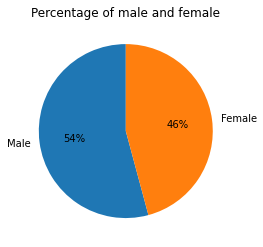

In [135]:
labels = ['Male', 'Female']
plt.pie(df_clean.gender_code.value_counts(), labels = labels, autopct='%.0f%%', startangle = 90)
plt.title("Percentage of male and female")
plt.show()

The number of male records is slightly more than the female.

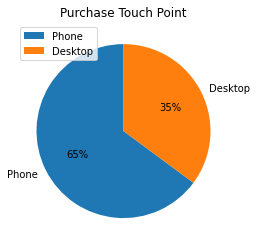

In [136]:
labels = ['Phone', 'Desktop']
plt.pie(df_clean.purchase_touchpoint.value_counts(), labels = labels, autopct='%.0f%%', startangle = 90)
plt.title('Purchase Touch Point')
plt.legend(labels)
plt.show()

The use of phone at touchpoint is more than desktop

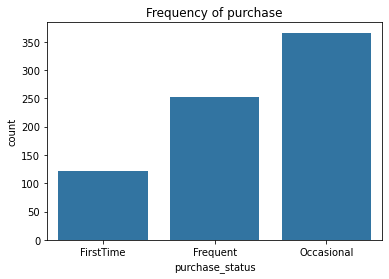

In [137]:
sns.countplot(data = df_clean, x = 'purchase_status', color=base_color)
plt.title('Frequency of purchase')
plt.show()

There are more people that ocassionally buys than those that frequently buys from the shops. The first time buyers are the least

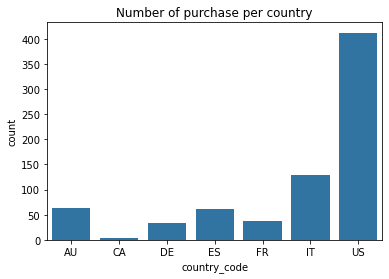

In [138]:
sns.countplot(data = df_clean, x = 'country_code', color=base_color)
plt.title('Number of purchase per country')
plt.show()

The system is used mostly in __USA__

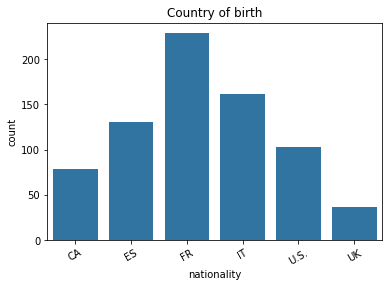

In [139]:
sns.countplot(data = df_clean, x = 'nationality', color=base_color)
plt.title('Country of birth')
plt.xticks(rotation=30)
plt.show()

There are more people from __France__ than any other country

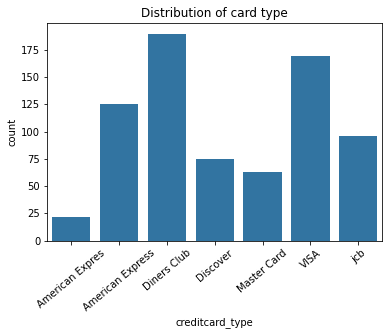

In [140]:
sns.countplot(data = df_clean, x = 'creditcard_type', color=base_color)
plt.title('Distribution of card type')
plt.xticks(rotation=40);

The `Dinners Club` is mostly used, followed by the `VISA card` and `American Express` is the least used

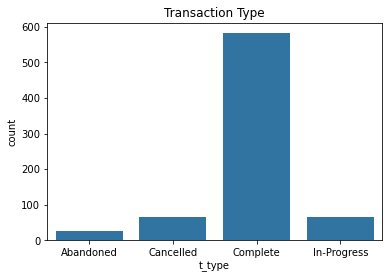

In [141]:
sns.countplot(data = df_clean, x = 't_type', color=base_color)
plt.title('Transaction Type')
plt.show()

Most transactions are completed whlie very few are abandoned or calcelled or in-progress

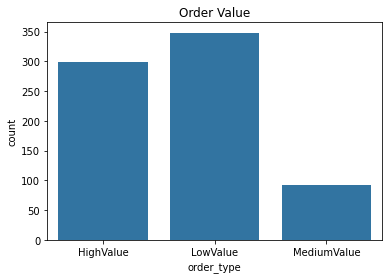

In [142]:
sns.countplot(data = df_clean, x = 'order_type', color=base_color)
plt.title('Order Value')
plt.show()

Most purchase are either low value or high value. There are few orders with medium value

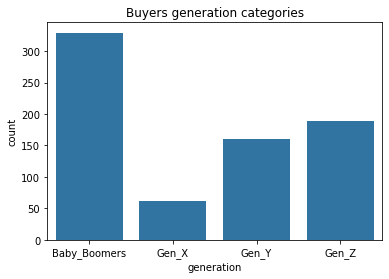

In [143]:
sns.countplot(data = df_clean, x = 'generation', color=base_color)
plt.title('Buyers generation categories')
plt.show()

The nuber of useres in diffrenet generations increases in the following order: `Baby Boomers`, `Gen X`, `Gen Y` and `Gen Z`

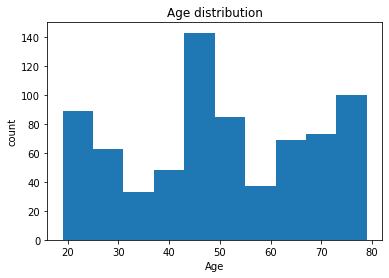

In [149]:
plt.hist(data = df_clean, x='age')
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age distribution')
plt.show()

Most buyers are around 45 to 50 years

## Bivariate Visualization

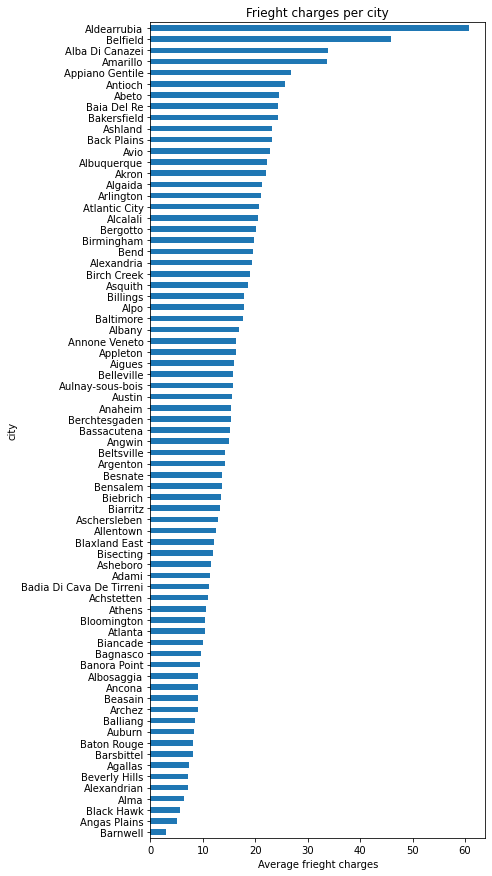

In [152]:
plt.figure(figsize=(6,15))
df_clean.groupby(['city']).mean().sort_values("freight_charges")["freight_charges"].plot.barh()
plt.title('Frieght charges per city')
plt.xlabel('Average frieght charges')
plt.show()

Aldearrubia has the highest mean charge on frieght while Barnwell has the least mean charge

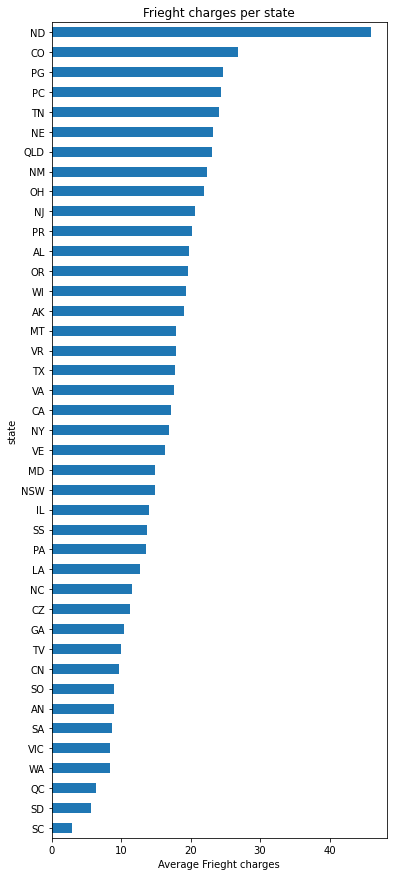

In [151]:
plt.figure(figsize=(6,15))
df_clean.groupby(['state']).mean().sort_values("freight_charges")["freight_charges"].plot.barh()
plt.title('Frieght charges per state')
plt.xlabel('Average Frieght charges')
plt.show()

`North Dakota` has the highest average frieght charges while `South Carolina` has the least

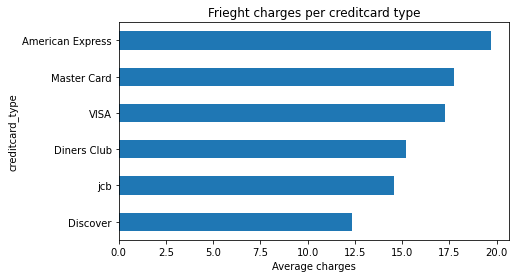

In [158]:
plt.figure(figsize=(7,4))
df_clean.groupby(['creditcard_type']).mean().sort_values("freight_charges")["freight_charges"].plot.barh()
plt.title('Frieght charges per creditcard type')
plt.xlabel('Average charges')
plt.show()

Customers pay more with `American Express`, followed by Master Card, `Visa`, `Dinners Club`, `JCB`, and `Discover`

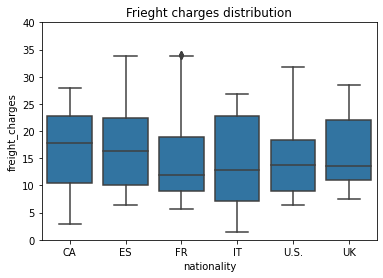

In [148]:
sns.boxplot(data = df_clean, x = 'nationality', y = 'freight_charges', color = base_color)
plt.title('Frieght charges distribution')
plt.ylim(0,40)
plt.show()

__Canada__ has the highest mean frieght charges, followed by __Spain__. With __France__ having the least mean freight charges and __Italy__ having the highest inter quartile range

In [162]:
df_clean.dtypes

cust_name                      object
gender_code                  category
address1                       object
city                           object
state                          object
country_code                 category
postal_code                    object
email_address                  object
phone_number                   object
creditcard_type              category
salesman_id                    object
nationality                  category
cust_id                         int32
order_id                        int32
order_time                     object
freight_charges               float64
order_salesman                 object
order_ship_date        datetime64[ns]
age                             int32
order_value                   float64
t_type                       category
purchase_touchpoint          category
purchase_status              category
order_type                   category
generation                   category
product                        object
dtype: objec

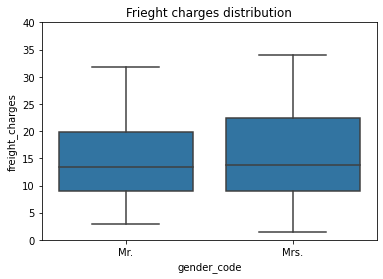

In [163]:
sns.boxplot(data = df_clean, x = 'gender_code', y = 'freight_charges', color = base_color)
plt.title('Frieght charges distribution')
plt.ylim(0,40)
plt.show()

Both male and female have similar mean and 25 percentile frieght charges but the female has slightly higher 75th percentile frieght charge

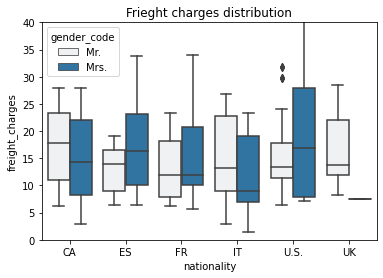

In [164]:
sns.boxplot(data = df_clean, x = 'nationality', y = 'freight_charges', hue = 'gender_code', color = base_color)
plt.title('Frieght charges distribution')
plt.ylim(0,40)
plt.show()